In [3]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CSV file
df = pd.read_csv('images.csv')

# Path to the original images folder (assuming it's in the same directory as the script)
original_path = 'images_original/'

# Read images and labels
images = []
labels = []

for index, row in df.iterrows():
    img_name = f"{row['image']}.jpg"  # Add .jpg file extension
    label = row['label']  # Use 'label' column
    
    img_path = os.path.join(original_path, img_name)
    
    # Check if the image exists
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        
        # Check if the image is read correctly
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize image to 128x128
            images.append(img)
            labels.append(label)
        else:
            print(f"Error reading image: {img_path}")
    else:
        print(f"Image not found: {img_path}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize images
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
np.save('classes.npy', label_encoder.classes_)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Reshape, SimpleRNN

# Build the CNN model with backpropagation
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten Layer
model.add(Flatten())

# Reshape for RNN
model.add(Reshape((-1, 18432)))

# RNN Layer
model.add(SimpleRNN(128, activation='relu'))

# First Dense Layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Second Dense Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Third Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with backpropagation (handled by the optimizer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 128)       512       
 chNormalization)                                                
                                                        

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
class CustomCallback(Callback):
    def __init__(self, target_accuracy=0.95):
        super(CustomCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% validation accuracy. Stopping training.")
            self.model.stop_training = True

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
custom_callback = CustomCallback(target_accuracy=0.95)

# Train the model
# Train the model and store the history
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, checkpoint, custom_callback])


Epoch 1/50
136/136 [==============================] - ETA: 0s - loss: 2.9877 - accuracy: 0.1340

c:\Users\arnim\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


136/136 [==============================] - 205s 1s/step - loss: 2.9877 - accuracy: 0.1340 - val_loss: 2.7229 - val_accuracy: 0.1610
Epoch 2/50
136/136 [==============================] - 200s 1s/step - loss: 2.7065 - accuracy: 0.1839 - val_loss: 2.6378 - val_accuracy: 0.2202
Epoch 3/50
136/136 [==============================] - 190s 1s/step - loss: 2.6282 - accuracy: 0.2131 - val_loss: 2.5536 - val_accuracy: 0.2609
Epoch 4/50
136/136 [==============================] - 190s 1s/step - loss: 2.5952 - accuracy: 0.2219 - val_loss: 2.5129 - val_accuracy: 0.2581
Epoch 5/50
136/136 [==============================] - 192s 1s/step - loss: 2.5694 - accuracy: 0.2455 - val_loss: 2.4734 - val_accuracy: 0.2525
Epoch 6/50
136/136 [==============================] - 190s 1s/step - loss: 2.5069 - accuracy: 0.2573 - val_loss: 2.4352 - val_accuracy: 0.2784
Epoch 7/50
136/136 [==============================] - 191s 1s/step - loss: 2.4637 - accuracy: 0.2631 - val_loss: 2.3672 - val_accuracy: 0.2747
Epoch 8/50

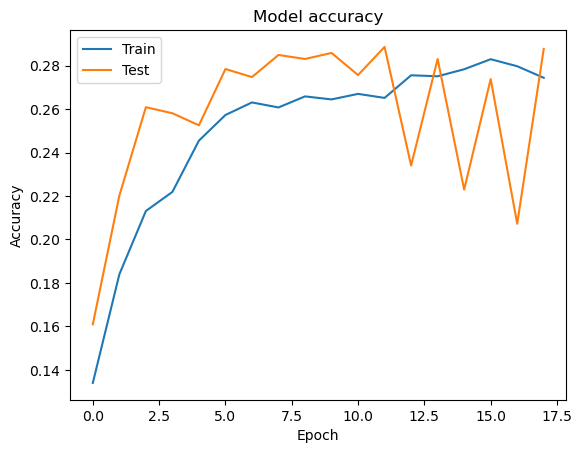

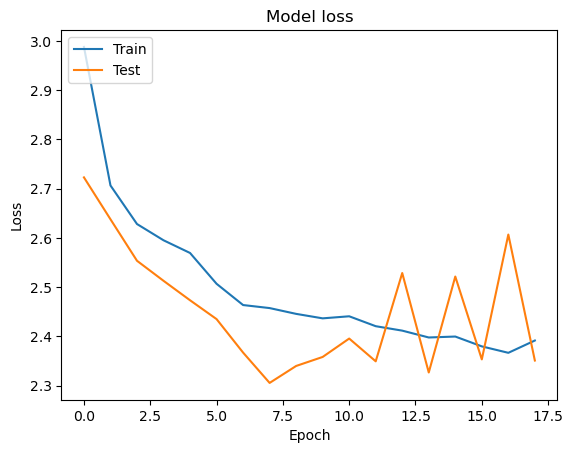

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:

model.save('clothing_classifier_model.h5')


NameError: name 'model' is not defined